# Exploratory Data Analysis (EDA) on Economic Indicator
Created on February 24th, 2023. 

In this notebook, we will perform the EDA on the time series dataset. There are 3 steps:
1. Installation Libraries
2. Dataset Preparation
3. EDA

##1. Installation Libraries

In [32]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index6')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

## 2. Dataset Preparation
To run the shared colab notebook for the first time, files are allocated differently from the Drive owner's. Changing a directory is necessary prior to importing the dataset, and these are the processes:
1. Right click to the `DataTeam1` folder, select `Add shortcut to Drive`, and then `My Drive`.
2. Upload Dataset file to the `IndexK` folder.
3. Do read_csv on your Dataset file.

In [34]:
df = pd.read_csv('UMCSENT.csv', index_col='DATE', parse_dates=True)
df = df.loc['1978-01-01':'2023-01-01']
df.UMCSENT = pd.to_numeric(df.UMCSENT)
df.head()


,UMCSENT
DATE,
1978-01-01,83.7
1978-02-01,84.3
1978-03-01,78.8
1978-04-01,81.6
1978-05-01,82.9


In [39]:
df['diff_1'] = df['UMCSENT'].diff()
df['diff_2'] = df['diff_1'].diff()
df['abs_diff_1'] = df['diff_1'].abs()
df['abs_diff_2'] = df['diff_2'].abs()
df = df.loc['1978-03-01':'2023-01-01']
df.head()

,UMCSENT,UMCSENT_normalized,diff_1,diff_2,abs_diff_1,abs_diff_2
DATE,,,,,,
1978-03-01,78.8,0.464516,-5.5,-6.1,5.5,6.1
1978-04-01,81.6,0.509677,2.8,8.3,2.8,8.3
1978-05-01,82.9,0.530645,1.3,-1.5,1.3,1.5
1978-06-01,80.0,0.483871,-2.9,-4.2,2.9,4.2
1978-07-01,82.4,0.522581,2.4,5.3,2.4,5.3


In [40]:
recession = pd.read_csv('../Index7/Recession.csv')
recession.head(30)

,DATE,JHDUSRGDPBR
0,1967-10-01,0.0
1,1968-01-01,0.0
2,1968-04-01,0.0
3,1968-07-01,0.0
4,1968-10-01,0.0
5,1969-01-01,0.0
6,1969-04-01,1.0
7,1969-07-01,1.0
8,1969-10-01,1.0
9,1970-01-01,1.0


In [41]:
recession.columns = ['DATE', 'recession']
recession['DATE'] = pd.to_datetime(recession['DATE'])
start = []
end = []
for i, date in enumerate(recession.DATE):
  if i == 0 or i==len(recession.DATE)-1:
    continue
  if (recession.recession[i-1] == 0) & (recession.recession[i] == 1):
    start.append(date)
  elif (recession.recession[i] == 1) & (recession.recession[i+1] == 0):
    end.append(date)
print(start)
print(end)
Reces = pd.DataFrame()
Reces['start'] = start
Reces['end'] = end



[Timestamp('1969-04-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1979-04-01 00:00:00'), Timestamp('1981-04-01 00:00:00'), Timestamp('1989-10-01 00:00:00'), Timestamp('2001-01-01 00:00:00'), Timestamp('2007-10-01 00:00:00'), Timestamp('2020-01-01 00:00:00')]
[Timestamp('1970-10-01 00:00:00'), Timestamp('1975-01-01 00:00:00'), Timestamp('1980-04-01 00:00:00'), Timestamp('1982-04-01 00:00:00'), Timestamp('1991-01-01 00:00:00'), Timestamp('2001-07-01 00:00:00'), Timestamp('2009-04-01 00:00:00'), Timestamp('2020-04-01 00:00:00')]


## 3. EDA
The analysis can be conducted at any timeline frequency, including, daily, weekly, and monthly. You can select any methods for analysis, in which the keyword for searching is 'Time series analysis'. 

To-do tasks:
1. Visualize the output
2. Discuss/analyze the result

Update meeting on March 2nd, 2023.

In [42]:
 # Min-max Normalization 
min_vals = np.min(df['UMCSENT'])
max_vals = np.max(df['UMCSENT'])
normalized_data = (df['UMCSENT'] - min_vals) / (max_vals - min_vals)
df['UMCSENT_normalized'] = normalized_data


<ipython-input-42-395c4a68d0a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UMCSENT_normalized'] = normalized_data


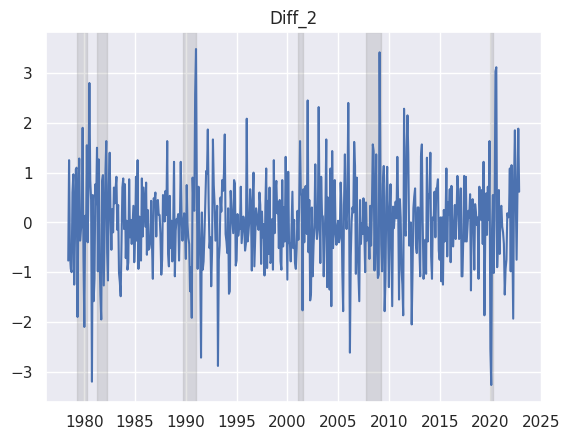

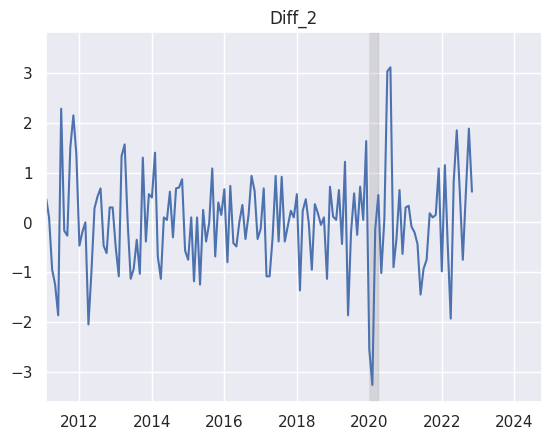

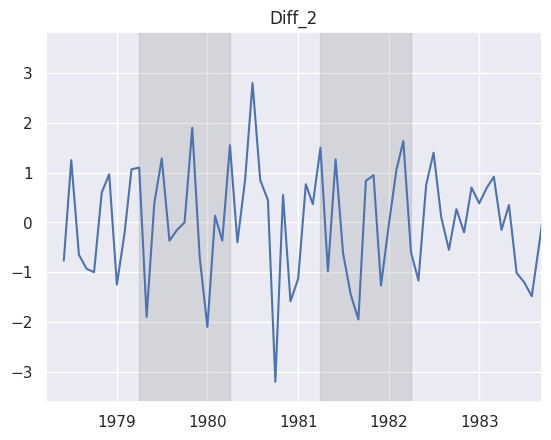

"fig, ax = plt.subplots()\n\nrolmean_abs = df['abs_diff_1'].rolling(window=3).mean()\n#ax.plot(df.index, df['abs_diff_1'])\nax.plot(df.index, rolmean_abs)\nfor i in range(2,8):\n  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)\nplt.title('ABS_Diff_1')\nplt.show()"

In [67]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
'''
fig, ax = plt.subplots()
ax.plot(df.index, df['UMCSENT'])
for i in range(2,8):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.title('Original')
plt.show()

fig, ax = plt.subplots()
rolmean_df = df['diff_1'].rolling(window=12).mean()
#ax.plot(df.index, df['diff_1'])
ax.plot(df.index, rolmean_df)
for i in range(2,8):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.title('Diff_1')
plt.show()'''

fig, ax = plt.subplots()
#rolmean_df2 = df['diff_2'].rolling(window=6, center=False).mean()
df['rolmean_df2'] = df['diff_2'].rolling(window=6, center=True).mean()

#ax.plot(df.index, df['diff_2'])
#ax.plot(df.index, rolmean_df2)
ax.plot(df.index, df.rolmean_df2)

for i in range(2,8):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.title('Diff_2')
plt.show()

fig, ax = plt.subplots()
#rolmean_df2 = df['diff_2'].rolling(window=6, center=False).mean()
df['rolmean_df2'] = df['diff_2'].rolling(window=6, center=True).mean()

#ax.plot(df.index, df['diff_2'])
#ax.plot(df.index, rolmean_df2)
ax.plot(df.index, df.rolmean_df2)

for i in range(2,8):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.title('Diff_2')
plt.xlim(15000,20000)
plt.show()

fig, ax = plt.subplots()
ax.plot(df.index, df.rolmean_df2)
for i in range(2,8):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.title('Diff_2')
plt.xlim(3000,5000)
plt.show()


'''fig, ax = plt.subplots()

rolmean_abs = df['abs_diff_1'].rolling(window=3).mean()
#ax.plot(df.index, df['abs_diff_1'])
ax.plot(df.index, rolmean_abs)
for i in range(2,8):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.title('ABS_Diff_1')
plt.show()'''

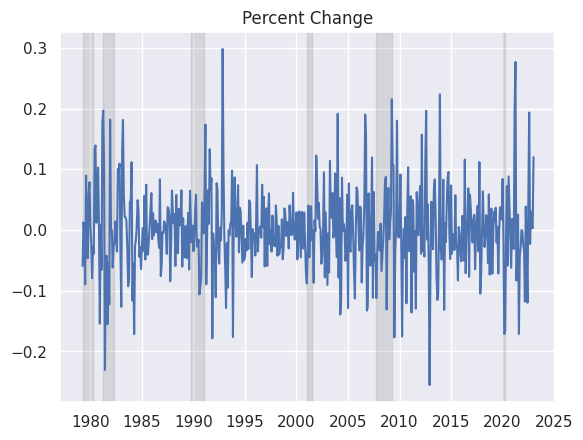

In [58]:
df['PCC'] = df['UMCSENT'].pct_change(periods=12)
#df['PCC_abs'] = df['PCC'].abs()
df['PCC_diff1'] = df['PCC'].diff()

fig, ax = plt.subplots()
ax.plot(df.index, df['PCC_diff1'])

#rolmean_df_PC = df['PCC_abs'].rolling(window=6).mean()
#ax.plot(df.index, rolmean_df_PC)
for i in range(2,8):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.title('Percent Change')
plt.show()





In [53]:
from functools import reduce
df['predict'] = df['rolmean_df2'].apply(lambda x: int(x>1.5))

li = []
for i in range(len(Reces)):
  li.append(df.reset_index()['DATE'].apply(lambda x: int((x > Reces.loc[i]['start'])&(x < Reces.loc[i]['end']))))
test = reduce(lambda x,y:x+y, li)
print(test.value_counts())
df['recession'] = test.values.copy()

<ipython-input-53-4cca9d909468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict'] = df['rolmean_df2'].apply(lambda x: int(x>1.5))


0    479
1     60
Name: DATE, dtype: int64


In [54]:
def calc_TP_FP_rate(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_true[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_true[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

# Test function
calc_TP_FP_rate(df['recession'], df['predict'])

(0.1, 0.04384133611691023)

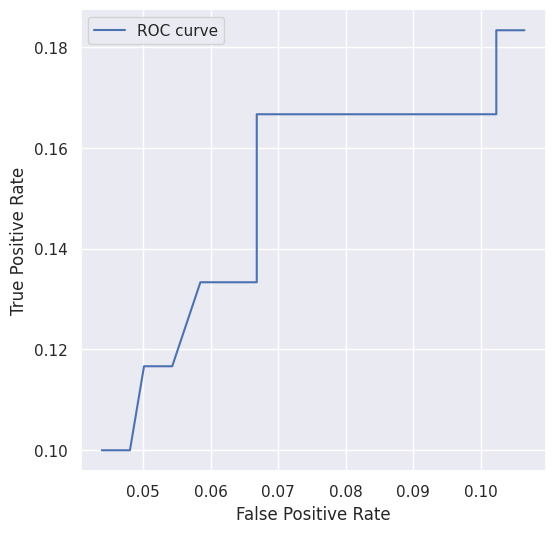

In [57]:
# Containers for true positive / false positive rates
tp_rates = []
fp_rates = []

threshold = np.linspace(1.00,1.5,num=100)

# Find true positive / false positive rate for each threshold
for t in threshold:
    
    df['predict'] = df['rolmean_df2'].apply(lambda x: int(x>t))
    tp_rate, fp_rate = calc_TP_FP_rate(df['recession'], df['predict'])
        
    tp_rates.append(tp_rate)
    fp_rates.append(fp_rate)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fp_rates, tp_rates, label='ROC curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend();

AttributeError: ignored

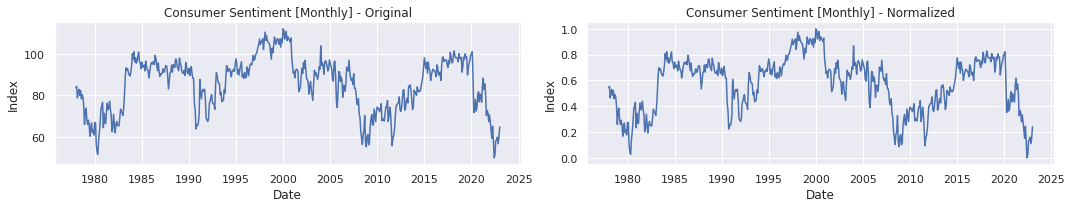

In [ ]:
#Plot 
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)

plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("Consumer Sentiment [Monthly] - Original")
plt.plot(df.index, df['UMCSENT'])

plt.subplot(122)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("Consumer Sentiment [Monthly] - Normalized")
plt.plot(df.index, df['UMCSENT_normalized'])

plt.tight_layout()






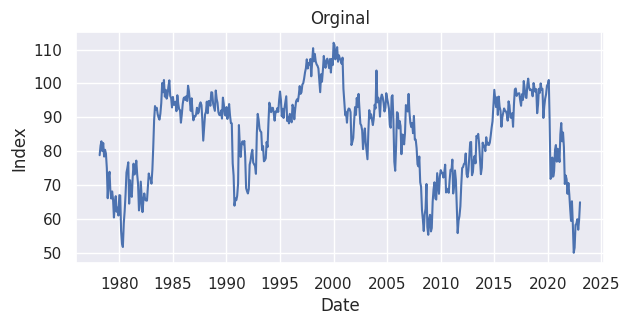

In [ ]:
#Plot 
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.subplot(121)
plt.xlabel('Date')
plt.ylabel('Index')
plt.title("Orginal")
for i in range(2,8):
  ax.axvspan(start[i], end[i], color='grey', alpha=0.2)
plt.plot(df.index, df['UMCSENT'])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='DATE'>

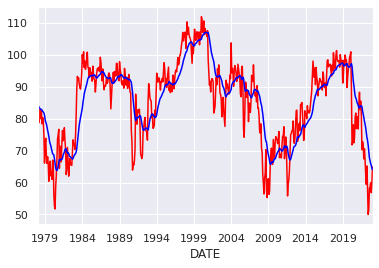

In [ ]:
# Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(df['UMCSENT']).fit(smoothing_level=.1,optimized=False)
#model = SimpleExpSmoothing(df['UMCSENT']).fit(optimized=True)
df['UMCSENT'].plot(color = 'red')
model.fittedvalues.plot(color = 'blue')

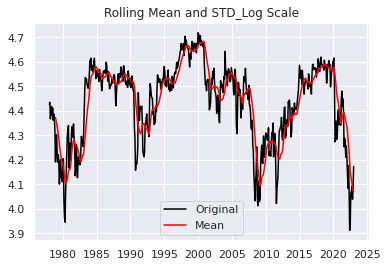

,UMCSENT,UMCSENT_normalized
DATE,,
1978-01-01,83.7,0.543548
1978-02-01,84.3,0.553226
1978-03-01,78.8,0.464516
1978-04-01,81.6,0.509677
1978-05-01,82.9,0.530645


In [ ]:
#Estimating Trend
UMCSENT_log = np.log(df['UMCSENT']) 

rolmean_log = UMCSENT_log.rolling(window=12).mean()
rolstd_log = UMCSENT_log.rolling(window=12).std()
original_log = plt.plot(UMCSENT_log, color = 'black', label = 'Original')
mean_log = plt.plot(rolmean_log, color = 'red', label = 'Mean')
#std_log = plt.plot(rolstd_log, color = 'blue', label = 'STD')
plt.legend(loc='best')
plt.title('Rolling Mean and STD_Log Scale')
plt.show(block=False)
UMCSENT_log.head()
df.head()

<ipython-input-32-11158f2779ff>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(411)


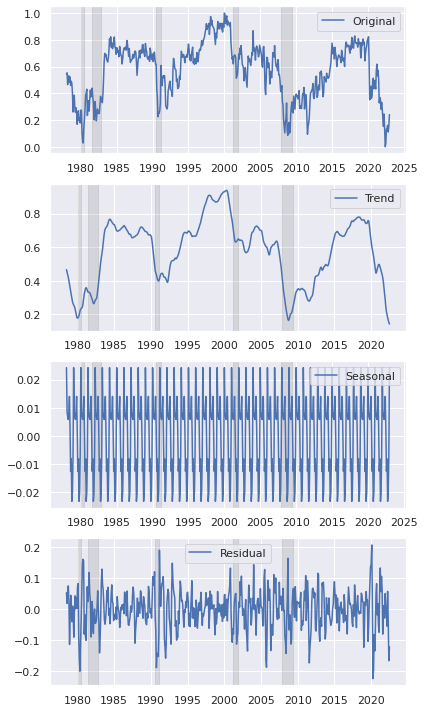

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['UMCSENT_normalized'], model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(10)


recession_periods = [('1980-01-01', '1980-07-01'), ('1981-07-01', '1982-11-01'), ('1990-07-01', '1991-03-01'),
                     ('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01')]


# display the chart
plt.xlabel("Time")


plt.subplot(411)
plt.plot(df['UMCSENT_normalized'], label = 'Original')
plt.legend(loc = 'best')

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')


for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)
plt.tight_layout()





(array([  5.,  10.,  24.,  62., 121., 156., 103.,  34.,  11.,   3.]),
 array([-0.2239095 , -0.18077045, -0.1376314 , -0.09449234, -0.05135329,
        -0.00821424,  0.03492481,  0.07806386,  0.12120291,  0.16434197,
         0.20748102]),
 <BarContainer object of 10 artists>)

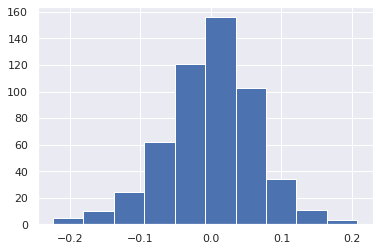

In [ ]:
plt.hist(residual)